In [1]:
%load_ext autoreload
%autoreload 2

import sys, os
sys.path.insert(1, os.path.join(sys.path[0], '../..'))
sys.path.insert(1, os.path.join(sys.path[0], '..'))

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns

from scipy import stats
from src import data
from portfolio_design.src import analysis as an
from portfolio_design.src import edhec_risk_kit as erk

%matplotlib inline

In [5]:
ind_df = data.get_industry_monthly_returns()
ind_df.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


<AxesSubplot:>

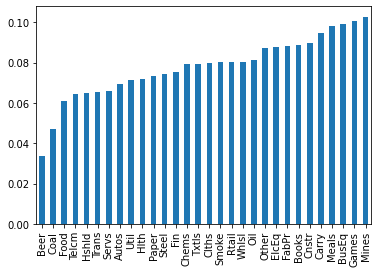

In [6]:
an.var_gaussian(ind_df, modified = True).sort_values().plot(kind = 'bar')

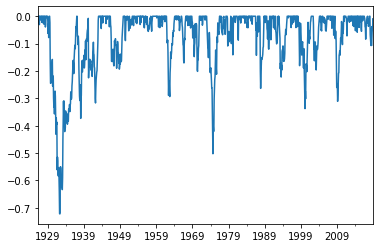

In [17]:
erk.drawdown(ind_df['Food'])['Drawdown'].plot();

In [20]:
erk.var_gaussian(
  ind_df[['Food', 'Smoke', 'Coal', 'Beer', 'Fin']],
  modified = True
)

Food     0.061207
Smoke    0.080292
Coal     0.047359
Beer     0.033881
Fin      0.075199
dtype: float64

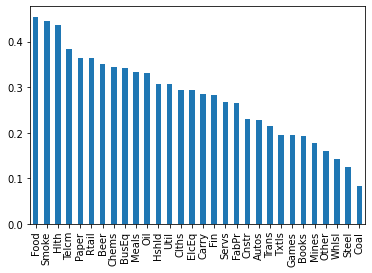

In [62]:
erk.sharpe_ratio(ind_df, .03, 12).sort_values(ascending = False).plot.bar();